# Eksik Veri Analizi

## Eksik Değerlerin Saptanması

In [34]:
import pandas as pd
df = pd.read_csv("/content/Meteorite_Landings.csv")

In [35]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [36]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [45]:
df.isnull().sum().sum()

22367

In [39]:
df[df.isnull().any(axis = 1)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.0, -99.0)"


In [46]:
df[df.notnull().all(axis = 1)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [41]:
df["year"].isnull().sum()

291

In [44]:
df[df["year"].isnull()]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
1937,Cacilandia,5191,Valid,H6,NaN,Found,NaN,NaN,NaN,NaN
3431,Apache Junction,54566,Valid,"Iron, IIIAB",25000.0,Found,NaN,33.45000,-111.51667,"(33.45, -111.51667)"
3462,Asarco Mexicana,2344,Valid,"Iron, IIIAB",NaN,Found,NaN,NaN,NaN,NaN
5008,Aus,4902,Valid,L,30.2,Found,NaN,-26.66667,16.25000,"(-26.66667, 16.25)"
...,...,...,...,...,...,...,...,...,...,...
38207,Valencia,24147,Valid,H5,33500.0,Found,NaN,39.00000,-0.03333,"(39.0, -0.03333)"
38231,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,NaN,-39.10000,-67.06667,"(-39.1, -67.06667)"
38308,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,NaN,49.41667,21.70000,"(49.41667, 21.7)"
38335,Wiltshire,56143,Valid,H5,92750.0,Found,NaN,51.14967,-1.81000,"(51.14967, -1.81)"


In [43]:
df[df["year"].isnull()]["year"]

37      NaN
1937    NaN
3431    NaN
3462    NaN
5008    NaN
         ..
38207   NaN
38231   NaN
38308   NaN
38335   NaN
45700   NaN
Name: year, Length: 291, dtype: float64

## Eksik Veri Yapısının Görselleştirilmesi

In [47]:
import missingno as msno

<Axes: >

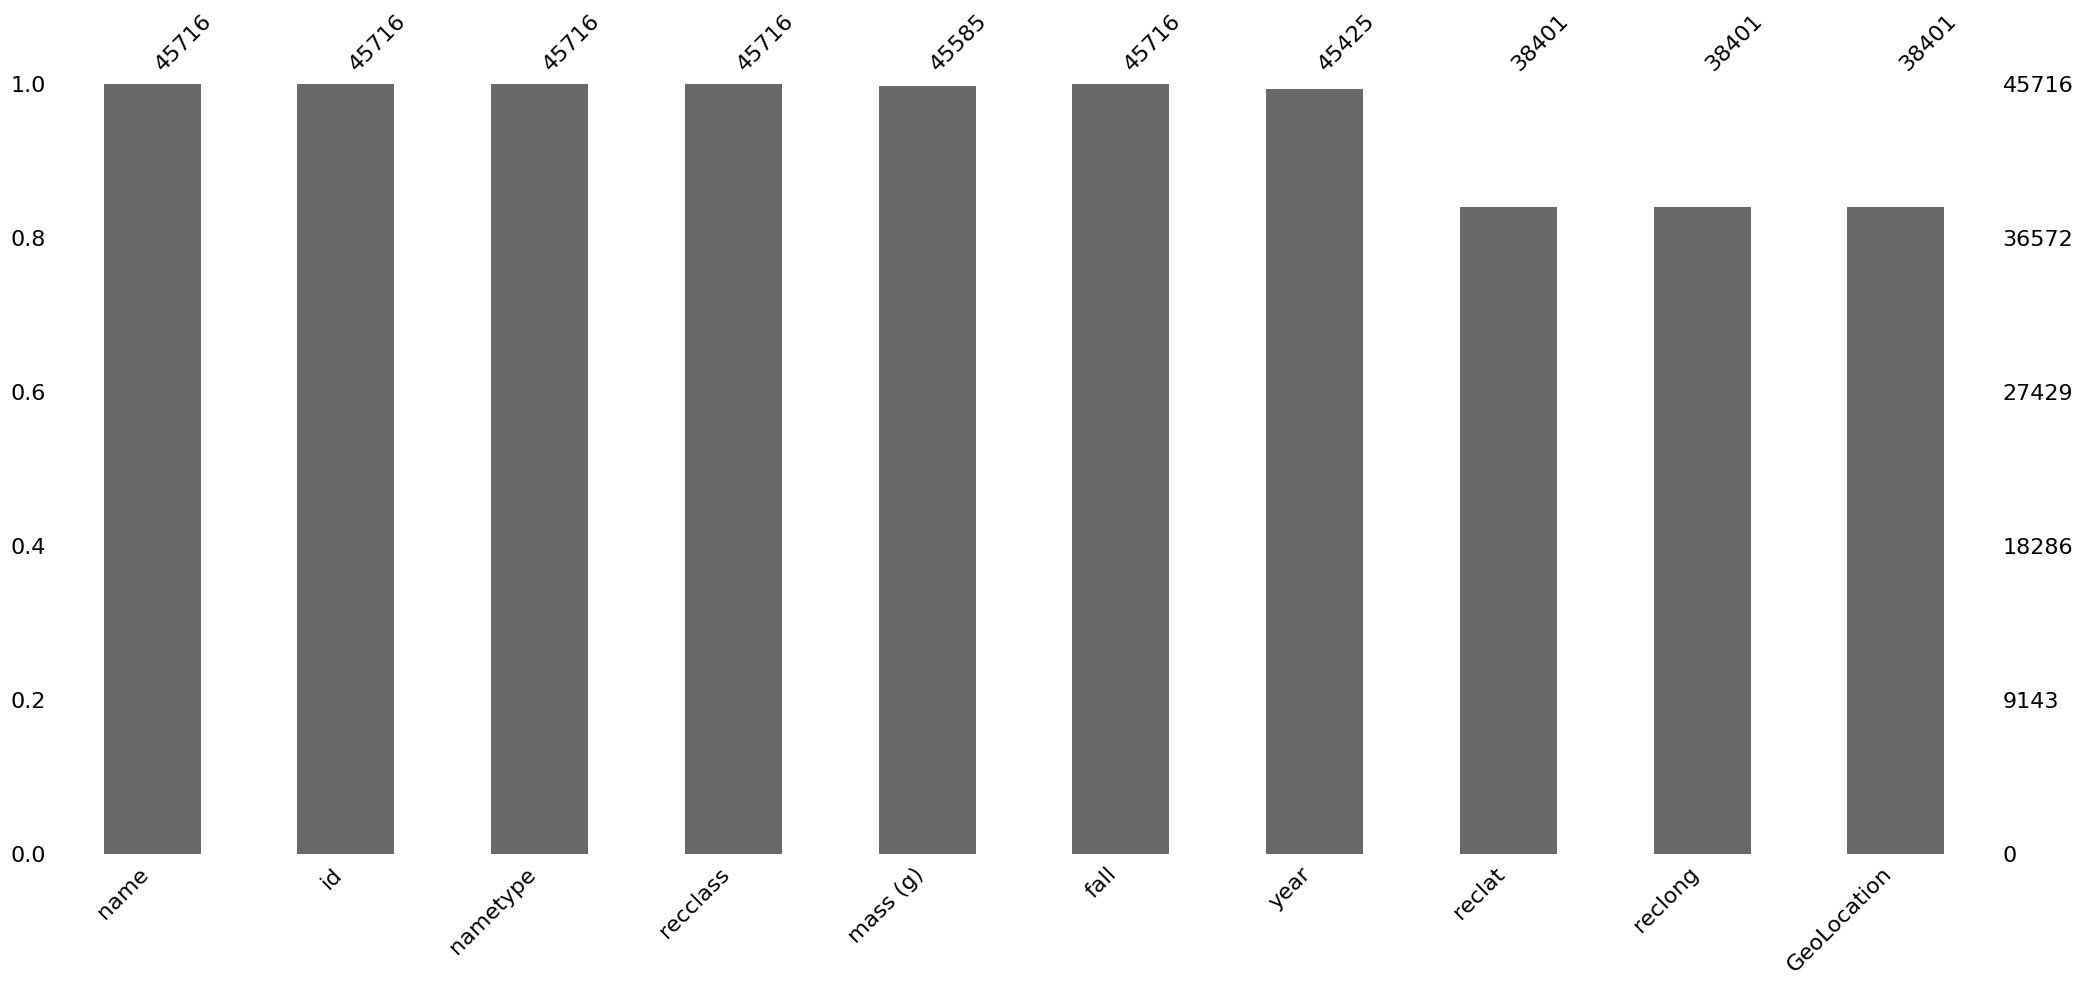

In [49]:
msno.bar(df)

<Axes: >

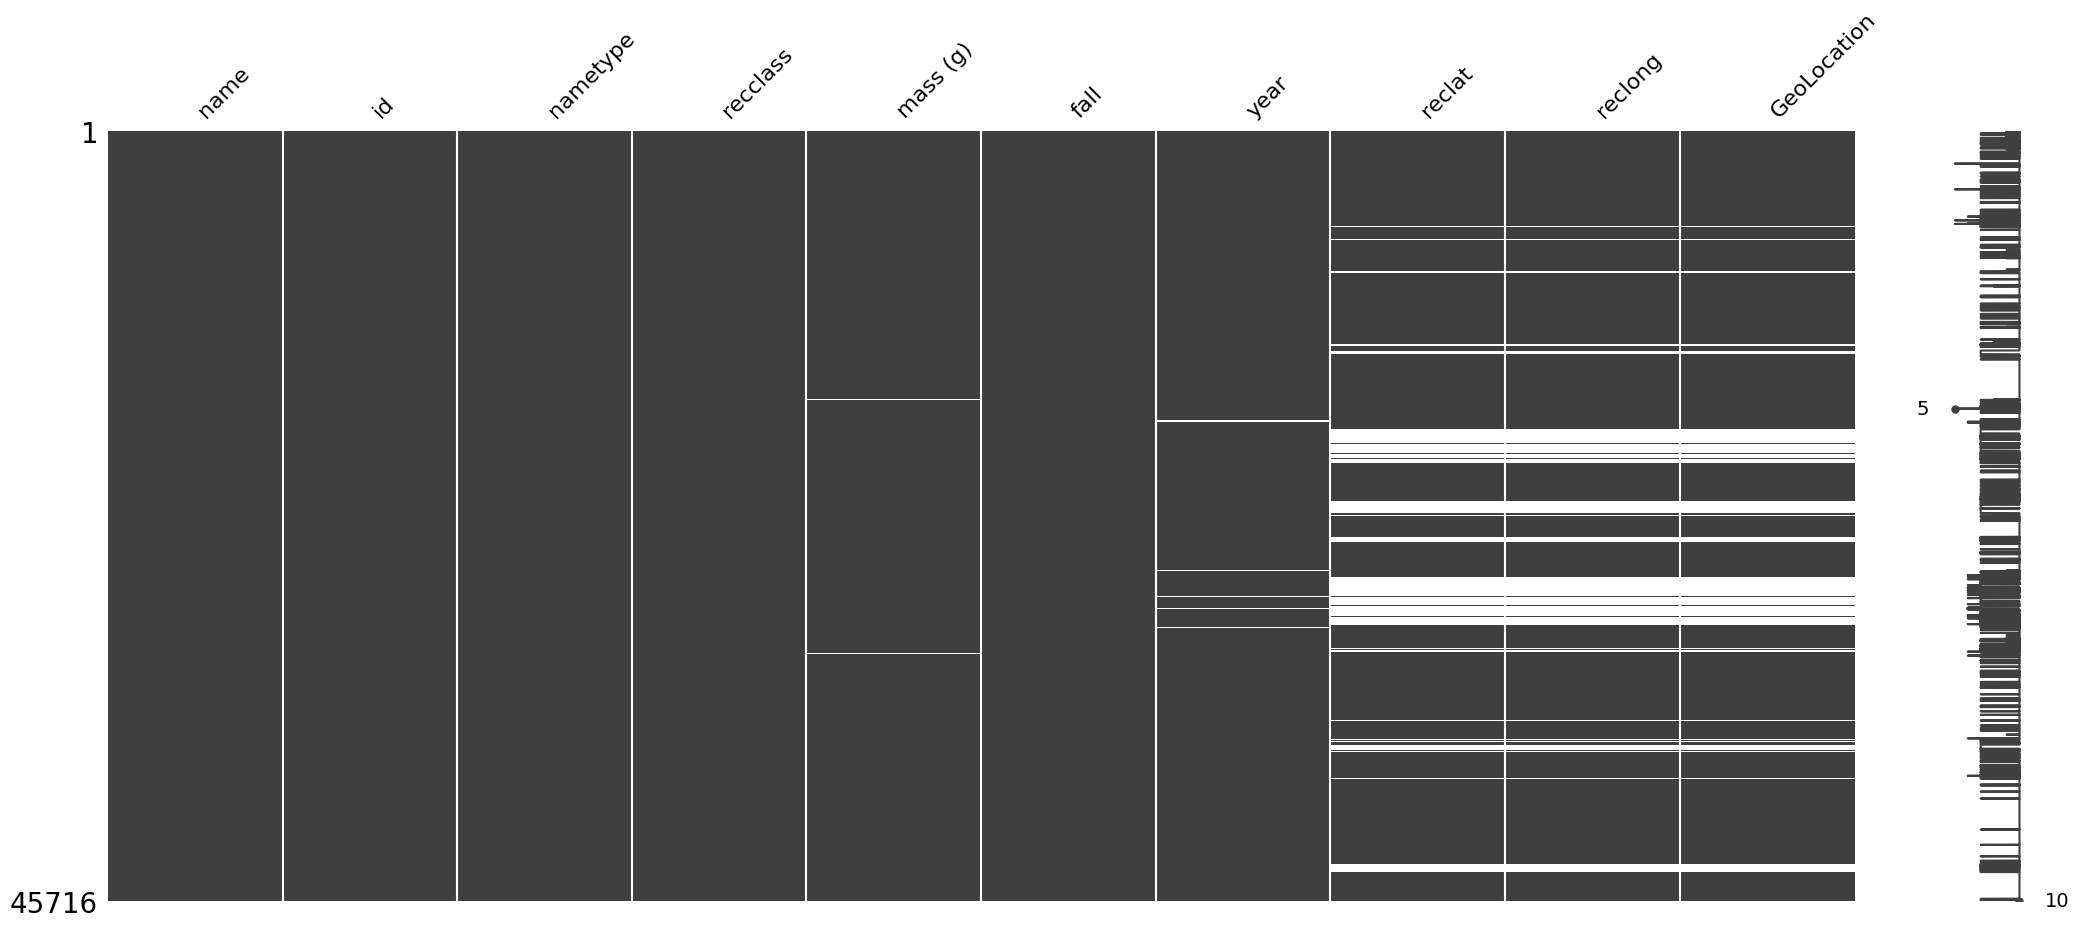

In [48]:
msno.matrix(df)

<Axes: >

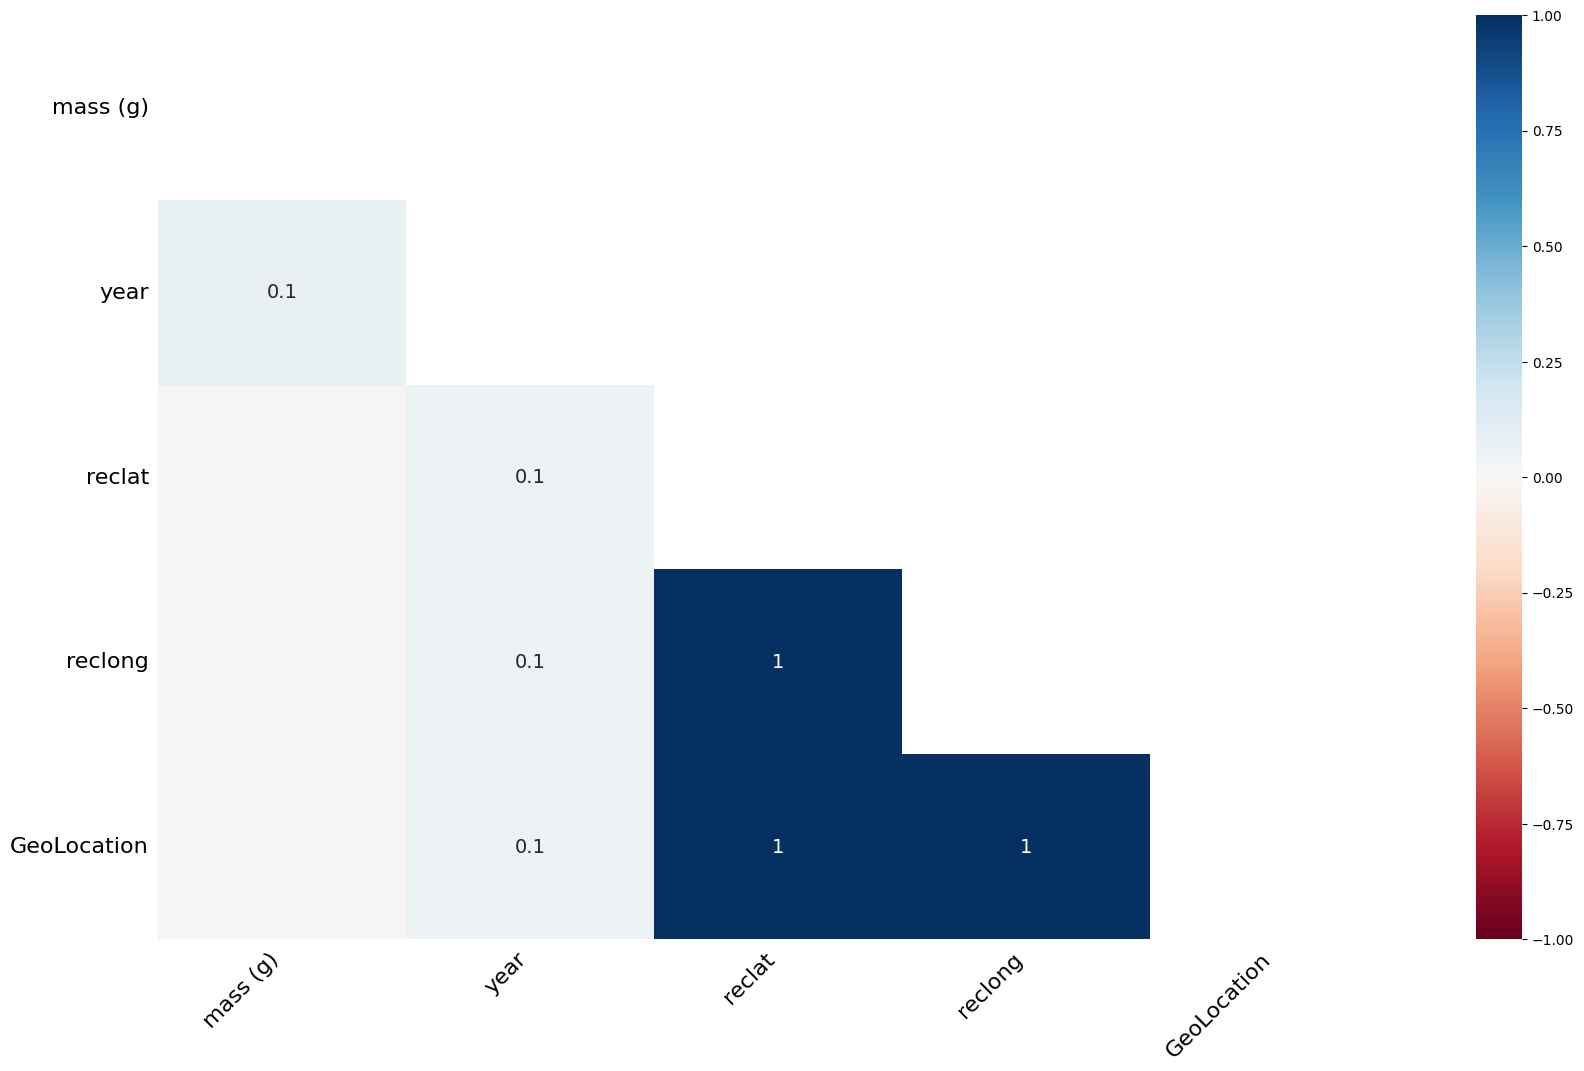

In [50]:
msno.heatmap(df)

## Silme Yöntemleri

In [58]:
df.dropna(inplace = True)    # eksik verileri sil       inplace: değişiklikleri kalıcı hale getirir.

In [59]:
df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [60]:
df = pd.read_csv("/content/Meteorite_Landings.csv")

In [70]:
df.dropna(how = "all")    # tamamında eksiklik olan verileri sil

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [71]:
df.dropna(axis = 1)    # sütunda eksik veri varsa sütunu sil

,name,id,nametype,recclass,fall
0,Aachen,1,Valid,L5,Fell
1,Aarhus,2,Valid,H6,Fell
2,Abee,6,Valid,EH4,Fell
3,Acapulco,10,Valid,Acapulcoite,Fell
4,Achiras,370,Valid,L6,Fell
...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,Found
45712,Zinder,30409,Valid,"Pallasite, ungrouped",Found
45713,Zlin,30410,Valid,H4,Found
45714,Zubkovsky,31357,Valid,L6,Found


In [72]:
df.dropna(axis = 1, how = "all")     #tamamında eksik veri varsa sütunu sil

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


## Değer Atama Yöntemleri

In [77]:
df[df["year"].isnull()]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
1937,Cacilandia,5191,Valid,H6,NaN,Found,NaN,NaN,NaN,NaN
3431,Apache Junction,54566,Valid,"Iron, IIIAB",25000.0,Found,NaN,33.45000,-111.51667,"(33.45, -111.51667)"
3462,Asarco Mexicana,2344,Valid,"Iron, IIIAB",NaN,Found,NaN,NaN,NaN,NaN
5008,Aus,4902,Valid,L,30.2,Found,NaN,-26.66667,16.25000,"(-26.66667, 16.25)"
...,...,...,...,...,...,...,...,...,...,...
38207,Valencia,24147,Valid,H5,33500.0,Found,NaN,39.00000,-0.03333,"(39.0, -0.03333)"
38231,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,NaN,-39.10000,-67.06667,"(-39.1, -67.06667)"
38308,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,NaN,49.41667,21.70000,"(49.41667, 21.7)"
38335,Wiltshire,56143,Valid,H5,92750.0,Found,NaN,51.14967,-1.81000,"(51.14967, -1.81)"


In [82]:
new_year = df["year"].fillna(0)    # sayısal değişken atama

In [84]:
new_year[37]        # kontrol için örnek olarak index 37'ye bakalım.

0.0

In [90]:
df["year"].mean()

1991.8288167308751

In [87]:
new_year1 = df["year"].fillna(df["year"].mean())      # ortalama ile doldurma

In [89]:
new_year1[37]                 # kontrol için örnek olarak index 37'ye bakalım.

1991.8288167308751

In [95]:
new_df = df.apply(lambda x : x.fillna(0), axis = 0)        # tüm değişkenlerde değiştirme

In [96]:
new_df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

## Kategorik Değişken Kırılımında Değer Atama

In [157]:
df = pd.read_csv("/content/Meteorite_Landings.csv")

In [158]:
df.head(13)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [172]:
df[df["mass (g)"].isnull()]["mass (g)"]

12      NaN
38      NaN
76      NaN
93      NaN
172     NaN
         ..
38282   NaN
38283   NaN
38285   NaN
41472   NaN
45698   NaN
Name: mass (g), Length: 131, dtype: float64

In [173]:
df.groupby("year")["mass (g)"].mean()

year
860.0        472.000000
920.0               NaN
1399.0    107000.000000
1490.0       103.300000
1491.0    127000.000000
              ...      
2010.0       633.563940
2011.0      1070.849593
2012.0       992.383248
2013.0      9471.636364
2101.0        55.000000
Name: mass (g), Length: 265, dtype: float64

In [174]:
new_maas = df["mass (g)"].fillna(df.groupby('year')['mass (g)'].transform("mean"))


In [175]:
new_maas[93]

53533.74423076923

## Kategorik Değişkenler için Eksik Değer Atama

In [176]:
df = pd.read_csv("/content/Meteorite_Landings.csv")

In [177]:
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [179]:
df["mass (g)"].mode()[0]

1.3

In [181]:
new_mass1 = df["mass (g)"].fillna(df["mass (g)"].mode()[0])

In [182]:
new_mass1

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass (g), Length: 45716, dtype: float64

In [183]:
new_mass1.isnull().sum()

0

In [185]:
df["mass (g)"].fillna(method = "bfill")            # boş olan değeri bir sonraki değerler değiştir.

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass (g), Length: 45716, dtype: float64

In [186]:
df["mass (g)"].fillna(method = "ffill")            # boş olan değeri bir önceki değerler değiştir.

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass (g), Length: 45716, dtype: float64